# Linear Regression from Scratch

In this notebook, we will implement linear regression using custom Python code. We will cover the following steps:

- Generating synthetic data
- Visualizing the data
- Implementing the linear regression algorithm
- Training the model
- Evaluating the results

Let's get started!

In [1]:
#import the module
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#generate random data
torch.manual_seed(0)
#random uniform distribution fallowing the monte carlo method
x_rand = torch.rand(100) * 6 - 3
x_rand = x_rand.unsqueeze(1)
y_rand = 2*x_rand + torch.randn(x_rand.shape)*0.9
print(x_rand.shape, y_rand.shape)

torch.Size([100, 1]) torch.Size([100, 1])


# The relationship between the independent variable and the dependent variable is linear

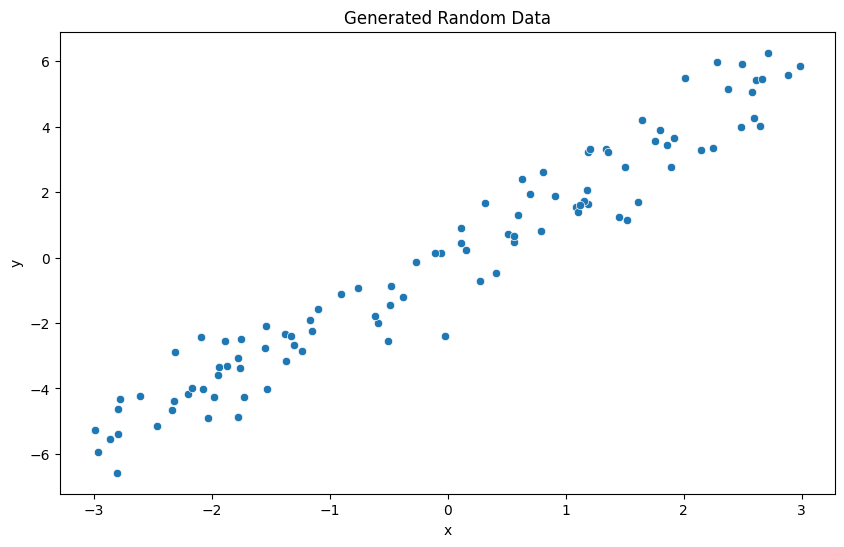

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy())
plt.title('Generated Random Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Basic math
y_pred = m*x_rand + c
so we need m and c to generate, first let's calculate randomly and backpropagation willl handle it
mean squared error
((y_pred - y_rand)**2).mean()



# implementing

Epoch 0, Loss: 6.859313488006592, m: 0.5846672058105469, c: -0.5149933099746704
Epoch 10, Loss: 2.4925146102905273, m: 1.1996486186981201, c: -0.4351782500743866
Epoch 20, Loss: 1.2373756170272827, m: 1.5249603986740112, c: -0.3640592098236084
Epoch 30, Loss: 0.861214816570282, m: 1.6973202228546143, c: -0.30282455682754517
Epoch 40, Loss: 0.7385217547416687, m: 1.7888678312301636, c: -0.25113406777381897
Epoch 50, Loss: 0.6923259496688843, m: 1.8376761674880981, c: -0.20801760256290436
Epoch 60, Loss: 0.6714125871658325, m: 1.8638477325439453, c: -0.17231731116771698
Epoch 70, Loss: 0.6602069735527039, m: 1.8780015707015991, c: -0.14289410412311554
Epoch 80, Loss: 0.6534892916679382, m: 1.8857532739639282, c: -0.11871553957462311
Epoch 90, Loss: 0.6492146253585815, m: 1.890075922012329, c: -0.09888391196727753


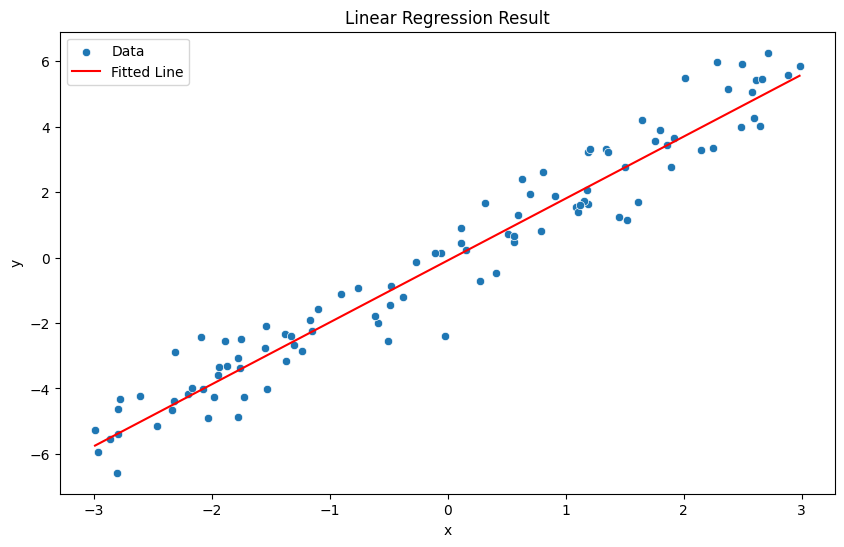

In [ ]:
#implementing linear regression
#lets assign initial values for m and c
m = torch.randn(1)
c = torch.randn(1) 


#lets update m and c using the gradients
learning_rate = 0.01  
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss MAE
    #mean squared error

    #mse
    loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
    #rmse
    #loss = torch.sqrt(loss)

    error = Y_pred - y_rand

    #calculate gradients
    m_grad =  (2/len(x_rand))*torch.sum(error*x_rand)
    c_grad = (2/len(x_rand))*torch.sum(error)

    #update m and c
    m =m -  learning_rate * m_grad
    c = c -  learning_rate * c_grad
    #print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')  
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## using different learning rate

Epoch 0, Loss: 19.298233032226562, RMSE: 4.392975330352783, m: -0.4072975516319275, c: -0.1209213137626648, Learning Rate: 0.01
Epoch 10, Loss: 5.844961643218994, RMSE: 2.417635440826416, m: 0.6799359321594238, c: -0.1226818636059761, Learning Rate: 0.01
Epoch 20, Loss: 2.0979795455932617, RMSE: 1.448440432548523, m: 1.2536882162094116, c: -0.11369147151708603, Learning Rate: 0.01
Epoch 30, Loss: 1.0525355339050293, RMSE: 1.025931477546692, m: 1.5565625429153442, c: -0.1008414775133133, Learning Rate: 0.01
Epoch 40, Loss: 0.7596181631088257, RMSE: 0.8715607523918152, m: 1.7165226936340332, c: -0.0874360054731369, Learning Rate: 0.01
Epoch 50, Loss: 0.6767287254333496, RMSE: 0.8226352334022522, m: 1.8010674715042114, c: -0.07494749873876572, Learning Rate: 0.01
Epoch 60, Loss: 0.6527298092842102, RMSE: 0.8079169392585754, m: 1.8458043336868286, c: -0.06393168866634369, Learning Rate: 0.01
Epoch 70, Loss: 0.6454247832298279, RMSE: 0.8033833503723145, m: 1.8695192337036133, c: -0.05450110

Text(0, 0.5, 'y')

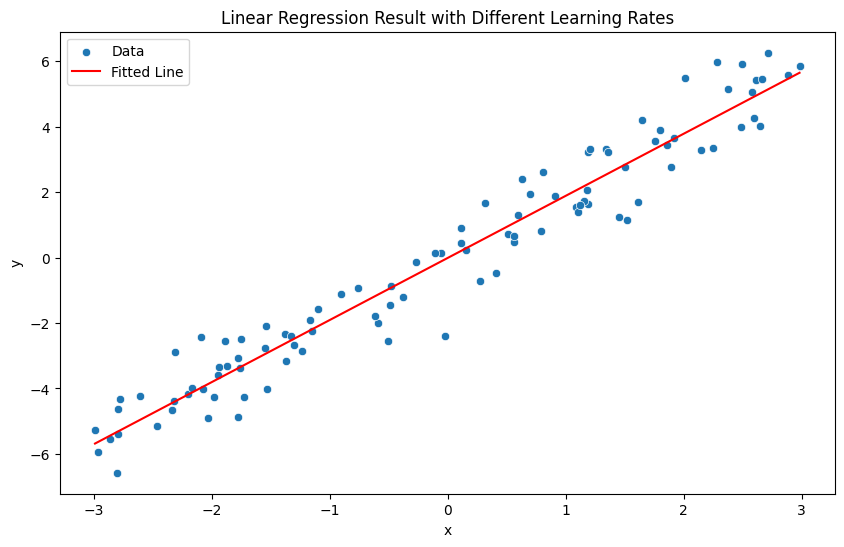

In [5]:
m = torch.randn(1)
c=  torch.randn(1)
epochs = 100
lrs = [0.01, 0.001, 0.002, 0.02, 0.03]
for lr in lrs:
    m = torch.randn(1)
    c = torch.randn(1)
    for epoch in range(epochs):
        Y_pred = m * x_rand + c
        error = Y_pred - y_rand
        #mean squared error
        loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
        loss_rmse = torch.sqrt(loss)
        m_grad = (2 / len(x_rand)) * torch.sum(error * x_rand)
        c_grad = (2 / len(x_rand)) * torch.sum(error)
        m = m - lr * m_grad
        c = c - lr * c_grad

        #print loss every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, RMSE: {loss_rmse.item()}, m: {m.item()}, c: {c.item()}, Learning Rate: {lr}')    
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result with Different Learning Rates')
plt.xlabel('x')
plt.ylabel('y')

## tunning the parameters

In [6]:
best_m = None
best_c = None
best_loss = float('inf')
epochs = 100
lrs = [0.01, 0.001, 0.002, 0.02, 0.03]
for lr in lrs:
    m =torch.randn(1)
    c = torch.randn(1)
    for epoch in range(epochs):
        Y_pred = m*x_rand+c
        error  = Y_pred - y_rand
        loss = torch.sum(abs(error)**2)/len(x_rand)
        if loss < best_loss:
            best_loss = loss
            best_m = m
            best_c = c
        m_grad = (2/len(x_rand))*torch.sum(error*x_rand)
        c_grad = (2/len(x_rand))*torch.sum(error)
        m = m - lr * m_grad
        c = c - lr * c_grad
        
    print(f"LR: {lr:.4f}, Final Loss: {loss.item():.4f}, m: {m.item():.4f}, c: {c.item():.4f}")

# Best parameters across all LRs
print(f"\nBest Parameters: m = {best_m.item():.4f}, c = {best_c.item():.4f}, Loss = {best_loss.item():.4f}")

LR: 0.0100, Final Loss: 0.6521, m: 1.9006, c: 0.0941
LR: 0.0010, Final Loss: 1.0037, m: 1.9538, c: 0.5871
LR: 0.0020, Final Loss: 2.8919, m: 1.2251, c: 0.8442
LR: 0.0200, Final Loss: 0.6409, m: 1.8971, c: -0.0088
LR: 0.0300, Final Loss: 0.6409, m: 1.8971, c: -0.0108

Best Parameters: m = 1.8971, c = -0.0088, Loss = 0.6409


### using the tunned value

Epoch 0, Loss: 3.737727642059326, m: 1.3620060682296753, c: 1.1823688745498657
Epoch 10, Loss: 1.1184786558151245, m: 1.8446950912475586, c: 0.6255040168762207
Epoch 20, Loss: 0.7729026675224304, m: 1.8990410566329956, c: 0.3319484293460846
Epoch 30, Loss: 0.6791614294052124, m: 1.9020174741744995, c: 0.1744745969772339
Epoch 40, Loss: 0.6519978046417236, m: 1.9002560377120972, c: 0.08964364230632782
Epoch 50, Loss: 0.6440961360931396, m: 1.89887535572052, c: 0.0438995361328125
Epoch 60, Loss: 0.6417970061302185, m: 1.8980756998062134, c: 0.01922668144106865
Epoch 70, Loss: 0.6411281824111938, m: 1.8976372480392456, c: 0.005918210372328758
Epoch 80, Loss: 0.6409334540367126, m: 1.8973997831344604, c: -0.0012604340445250273
Epoch 90, Loss: 0.640876829624176, m: 1.8972716331481934, c: -0.005132630001753569


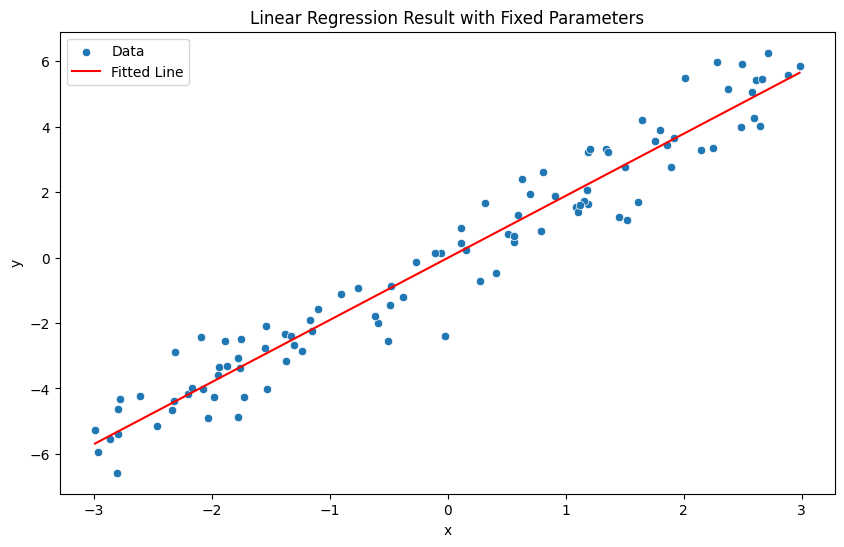

In [7]:
m =  1.2334
c =  1.2614
lr = 0.03
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss MAE
    #mean squared error
    loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
    #rmse
    #loss = torch.sqrt(loss)

    error = Y_pred - y_rand

    #calculate gradients
    m_grad =  (2/len(x_rand))*torch.sum(error*x_rand)
    c_grad = (2/len(x_rand))*torch.sum(error)

    #update m and c
    m =m -  lr * m_grad
    c = c -  lr * c_grad
    #print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')      
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result with Fixed Parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## prediction

In [8]:
new_x = torch.tensor([[-1.5], [0], [1.0], [2.5], [3.0]])  

# Make predictions
predictions = best_m * new_x + best_c

print("Predictions:")
for x, y_pred in zip(new_x, predictions):
    print(f"x = {x.item():.2f} and y_pred = {y_pred.item():.2f}")

Predictions:
x = -1.50 and y_pred = -2.85
x = 0.00 and y_pred = -0.01
x = 1.00 and y_pred = 1.89
x = 2.50 and y_pred = 4.73
x = 3.00 and y_pred = 5.68


## Assumptions of Linear Regression

1. **Linearity**: The relationship between the independent variable and the dependent variable is linear.

2. **Homoscedasticity**: The constant variance of residuals in LR model.

3. **Independence of residuals**: The residuals (errors) are independent of each other the Violations often occur in time-series data or when data points are clustered.

4. **Normality of Errors**: The residuals are normally distributed, which in our case because we used torch.randn 

5. **No Multicollinearity**: The independent variables are not highly correlated with each other.

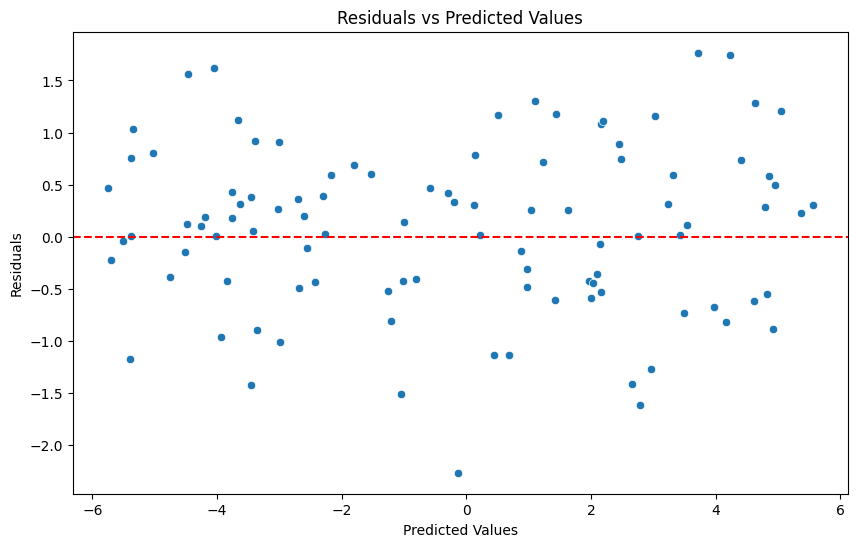

Breusch-Pagan test p-value: 0.2343
No evidence of heteroscedasticity (fail to reject null hypothesis)


In [14]:
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan
# Calculate residuals
residuals = (y_rand - Y_pred).detach().numpy()

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_pred.detach().numpy().flatten(), y=residuals.flatten())
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


x_np = x_rand.detach().numpy()
y_np = y_rand.detach().numpy()
residuals_np = residuals

# Add a constant term  to x_np
x_with_constant = np.column_stack((np.ones_like(x_np), x_np))

# Perform Breusch-Pagan test

lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals_np, x_with_constant)
print(f"Breusch-Pagan test p-value: {lm_p_value:.4f}")
if lm_p_value < 0.05:
    print("Evidence of heteroscedasticity (reject null hypothesis)")
else:
    print("No evidence of heteroscedasticity (fail to reject null hypothesis)")

This means that your residuals (errors) likely have constant variance hence homoscedasticity